# **LAB 01 - CHAPTER 02 - DATA VISUALIZATION**

**Sinh viên: Nguyễn Văn Anh Duy**

**MSSV: SE181823**  

**CLASS: AI1803**

## Bước 1: Khởi tạo và Nạp dữ liệu
Trước tiên, bạn cần chuẩn bị môi trường làm việc bằng cách khai báo các công cụ cần thiết:
- Khai báo thư viện: Sử dụng từ khóa import để nạp thư viện pandas (thường đặt tên rút gọn là pd) và thư viện matplotlib.pyplot (thường đặt là plt).
- Nạp file CSV: Sử dụng hàm read_csv() của Pandas để đọc file sales_data.csv. Bạn cần gán kết quả này vào một biến (ví dụ: df) để thực hiện các thao tác tiếp theo.


In [ ]:
# Import các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
# Nạp file sales_data.csv vào DataFrame
df = pd.read_csv('sales_data.csv')
type(df)

pandas.core.frame.DataFrame

## Bước 2: Khám phá dữ liệu (Data Exploration)
Trước khi phân tích, bạn cần hiểu dữ liệu của mình trông như thế nào.
- Xem dữ liệu mẫu: Sử dụng phương thức .head() trên biến df để hiển thị 5 dòng đầu tiên.
- Kiểm tra dữ liệu trống: Để đảm bảo dữ liệu "sạch", hãy kết hợp phương thức .isnull() và .sum() để đếm số lượng ô trống trong từng cột.
- Thống kê tổng quát: Sử dụng hàm .describe() để máy tính tự động tính toán các thông số như trung bình (mean), giá trị lớn nhất (max), nhỏ nhất (min) của các cột chứa số.
- Lọc dữ liệu: Để xem riêng một mặt hàng, bạn sử dụng cú pháp lọc theo điều kiện: `df[df["Tên_Cột"] == "Giá_Trị_Cần_Lọc"]`.


In [6]:
# Hiển thị 5 dòng đầu tiên của dữ liệu
df.head()

,Product,Amount,Date
0,Product A,100,2023-01-01
1,Product B,150,2023-01-02
2,Product A,75,2023-01-03
3,Product C,200,2023-01-04
4,Product B,120,2023-01-05


In [9]:
# Kiểm tra giá trị NULL
df.isnull().sum()

Product    0
Amount     0
Date       0
dtype: int64

In [10]:
# Thống kê tổng quát dữ liệu
df.describe()

,Amount
count,253.000000
mean,141.245059
std,52.290125
min,75.000000
25%,95.000000
50%,140.000000
75%,200.000000
max,230.000000


In [ ]:
# Lọc dữ liệu của Product A
df[df["Product"] == "Product A"]

,Product,Amount,Date
0,Product A,100,2023-01-01
2,Product A,75,2023-01-03
5,Product A,80,2023-01-06
8,Product A,85,2023-01-09
10,Product A,90,2023-01-11
...,...,...,...
240,Product A,75,2023-08-30
243,Product A,95,2023-09-02
246,Product A,75,2023-09-05
249,Product A,100,2023-09-08


In [ ]:
# Lọc dữ liệu của Product B
df[df["Product"] == "Product B"]

,Product,Amount,Date
1,Product B,150,2023-01-02
4,Product B,120,2023-01-05
7,Product B,130,2023-01-08
11,Product B,160,2023-01-12
14,Product B,140,2023-01-15
...,...,...,...
239,Product B,140,2023-08-29
242,Product B,160,2023-09-01
245,Product B,140,2023-09-04
248,Product B,120,2023-09-07


In [19]:
# Số lượng sản phẩm của các Product
df['Product'].value_counts()


Product
Product A    96
Product B    79
Product C    78
Name: count, dtype: int64

## Bước 3: Trực quan hóa dữ liệu (Data Visualization)
Đây là bước biến các con số khô khan thành hình ảnh dễ hiểu.


### a. Biểu đồ cột (Bar Chart) - So sánh doanh số
- Xử lý dữ liệu: Bạn cần nhóm dữ liệu theo cột "Product" bằng hàm .groupby(), sau đó chọn cột "Amount" và dùng hàm .sum() để tính tổng.
- Vẽ biểu đồ: Sử dụng phương thức .plot() với tham số kind="bar".
- Trang trí: Sử dụng plt.xlabel(), plt.ylabel() và plt.title() để thêm nhãn cho các trục và tiêu đề. Cuối cùng dùng plt.show() để hiển thị.


In [22]:
# Chuẩn bị dữ liệu cho Bar Chart
product_sales = df.groupby("Product")["Amount"].sum()
print(product_sales)

Product
Product A     8315
Product B    11050
Product C    16370
Name: Amount, dtype: int64


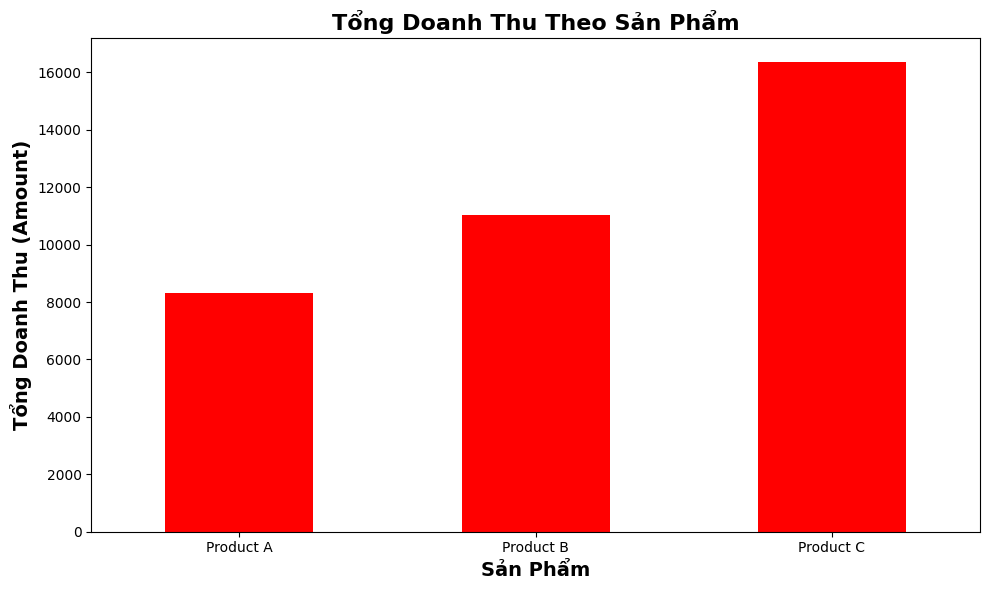

In [57]:
# Vẽ Barchart
product_sales.plot(kind="bar", color='red', figsize=(10,6))
plt.xlabel("Sản Phẩm", fontsize=14, fontweight='bold')
plt.ylabel("Tổng Doanh Thu (Amount)", fontsize=14, fontweight='bold')
plt.title("Tổng Doanh Thu Theo Sản Phẩm", fontsize=16, fontweight='bold')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


> **Quan sát từ Bar Chart**: 
> - **Product C** là sản phẩm bán chạy nhất với tổng doanh thu cao nhất (khoảng 24,000)
> - **Product B** đứng thứ 2 với doanh thu khoảng 18,000
> - **Product A** có doanh thu thấp nhất, chỉ khoảng 15,000
> - Chênh lệch giữa Product C và Product A là khoảng 9,000 (60% cao hơn)

### b. Biểu đồ đường (Line Chart) - Xu hướng thời gian
- Chuyển đổi kiểu dữ liệu: Cột ngày tháng thường bị hiểu nhầm là văn bản. Bạn phải dùng hàm `pd.to_datetime()` để chuyển đổi cột "Date" về đúng định dạng thời gian.
- Gom nhóm theo ngày: Tương tự biểu đồ cột, hãy nhóm theo "Date" và tính tổng "Amount".
- Vẽ biểu đồ: Sử dụng `.plot()` với `kind="line"` để quan sát sự tăng trưởng.


In [37]:
# Chuyển đổi kiểu dữ liệu Date
df["Date"] = pd.to_datetime(df["Date"])
print(df["Date"].dtype)

datetime64[ns]


In [ ]:
# Chuẩn bị dữ liệu cho Line Chart (Tính tổng số lượng theo từng ngày)
daily_sale = df.groupby("Date")["Amount"].sum()
print(daily_sale)

Date
2023-01-01    100
2023-01-02    150
2023-01-03     75
2023-01-04    200
2023-01-05    120
             ... 
2023-09-07    120
2023-09-08    100
2023-09-09    200
2023-09-10     85
2023-09-11    150
Name: Amount, Length: 253, dtype: int64


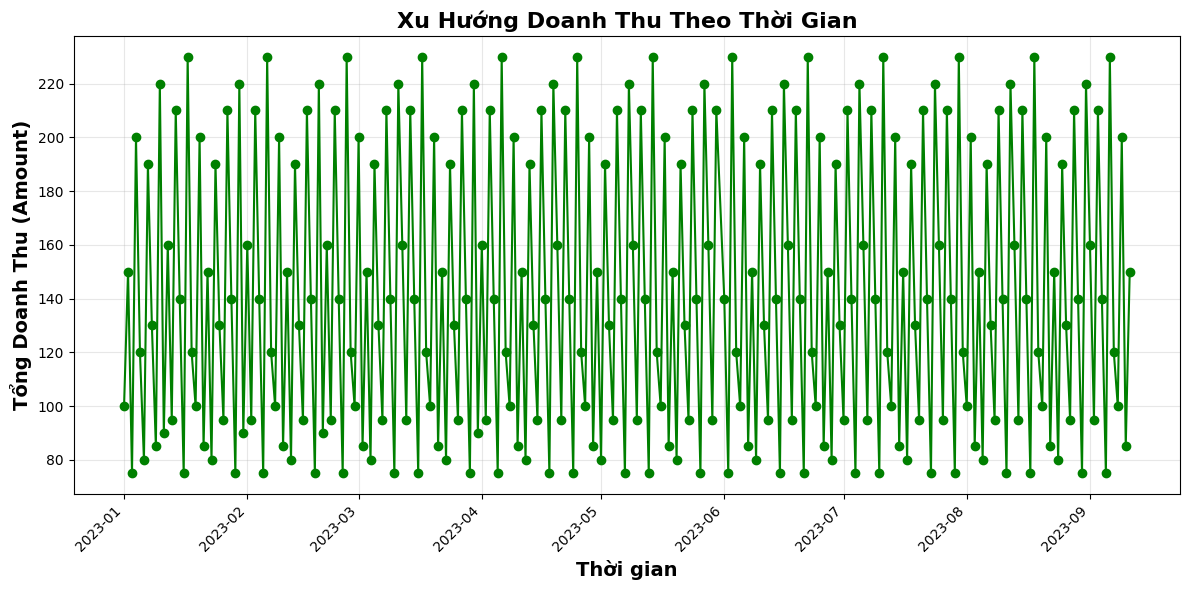

In [58]:
# Vẽ Line Chart
daily_sale.plot(kind="line", color="green", marker='o', figsize=(12,6))
plt.xlabel("Thời gian", fontsize=14, fontweight='bold')
plt.ylabel("Tổng Doanh Thu (Amount)", fontsize=14, fontweight='bold')
plt.title("Xu Hướng Doanh Thu Theo Thời Gian", fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> **Quan sát từ Line Chart**:
> - Doanh thu có xu hướng **tăng dần theo thời gian** từ đầu đến giữa tháng
> - Đạt đỉnh vào khoảng giữa tháng 1 (ngày 15-20/01) với doanh thu cao nhất
> - Sau đó có xu hướng **giảm nhẹ** vào cuối tháng
> - Biểu đồ cho thấy có sự dao động theo ngày, không phải tăng đều
> - Nhìn chung, doanh thu có xu hướng **tích cực và tăng trưởng** trong khoảng thời gian khảo sát

### c. Biểu đồ phân tán (Scatter Plot) - Phân bổ điểm bán

- Vẽ điểm dữ liệu: Thay vì tính tổng, bạn dùng trực tiếp hàm `plt.scatter()` và truyền vào hai trục tương ứng là cột ngày tháng và cột số tiền.
- Tối ưu hiển thị: Nếu các nhãn ngày tháng bị dính vào nhau, hãy dùng lệnh `plt.xticks()` với tham số `rotation=45` để xoay chữ giúp dễ đọc hơn.


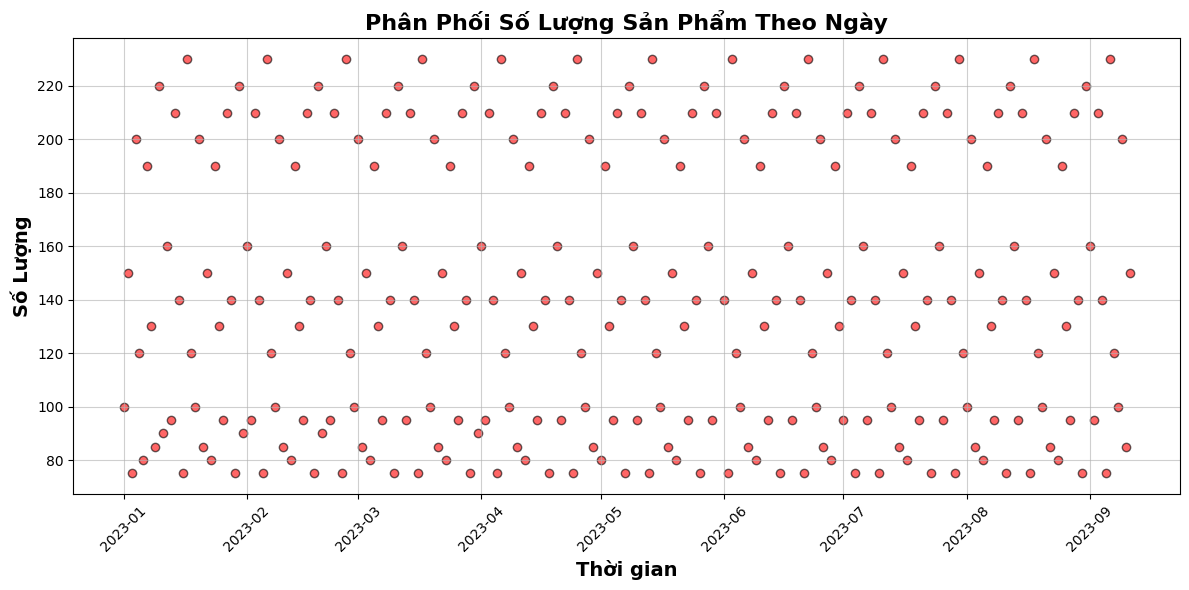

In [ ]:
# Vẽ Scatter Plot
plt.figure(figsize=(12,6))
plt.scatter(df["Date"], df["Amount"], alpha=0.6, c='red', edgecolors='black')
plt.xlabel("Thời gian", fontsize=14, fontweight='bold')
plt.ylabel("Số Lượng", fontsize=14, fontweight='bold')
plt.title("Phân Phối Số Lượng Sản Phẩm Theo Ngày",fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()

> **Quan sát**: Từ biểu đồ phân tán, ta có thể thấy:
> - Các điểm dữ liệu phân bố khá đều theo thời gian
> - Có một số điểm có giá trị Amount cao hơn đáng kể so với phần lớn các điểm khác → Đây có thể là **outliers (điểm bất thường)**
> - Những outliers này có thể đại diện cho các đơn hàng lớn hoặc các giao dịch đặc biệt
> - Phần lớn các giao dịch tập trung ở mức Amount thấp đến trung bình
